# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.033676,0.996417,0.872652
1,2020-01-02,0.855909,0.400491,0.097387
2,2020-01-03,0.753555,0.599382,0.950919
3,2020-01-04,0.910536,0.770671,0.960969
4,2020-01-05,0.639575,0.688345,0.367119


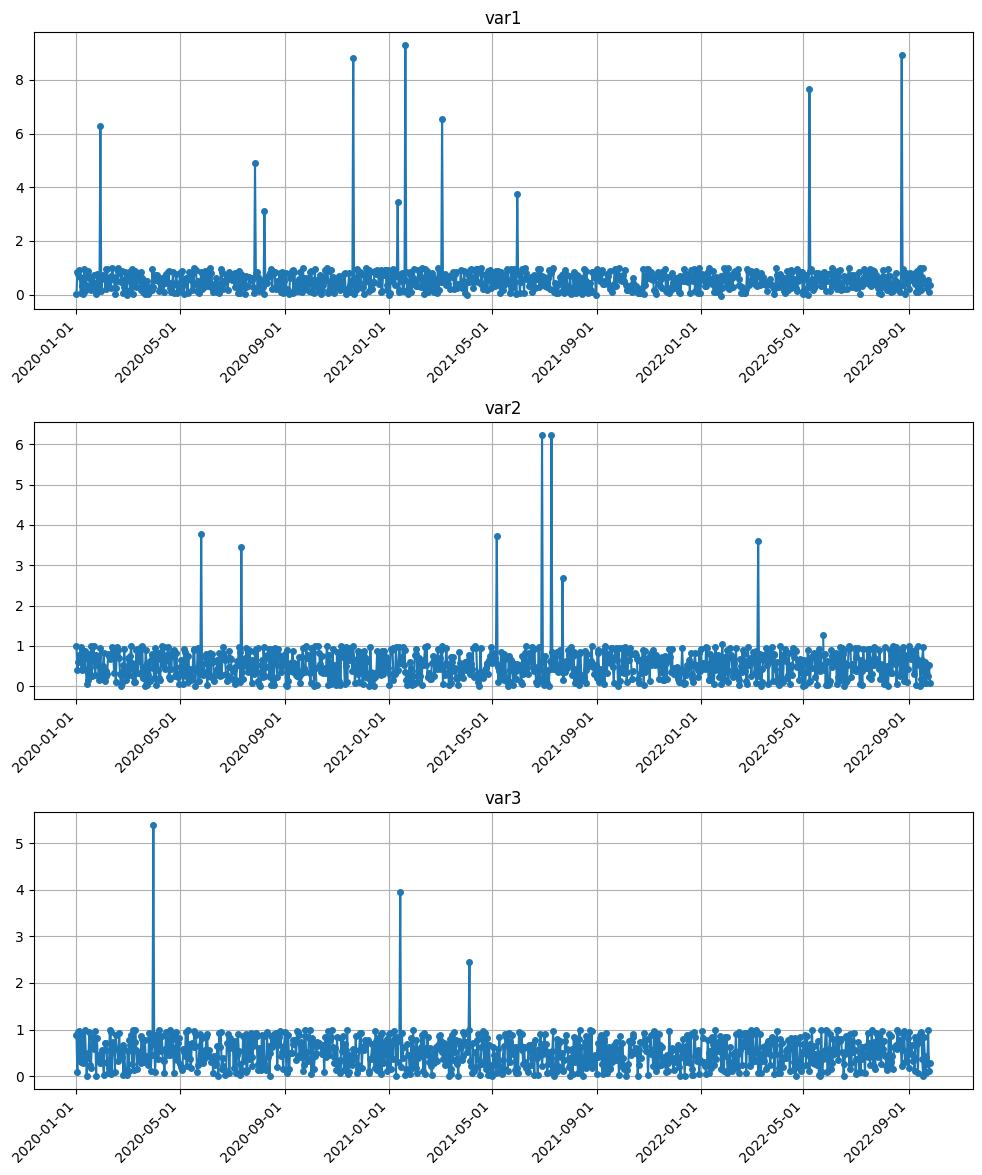

In [3]:
# plot the data
plot_df(df)

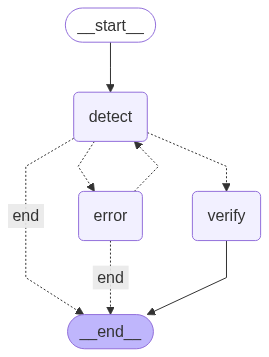

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-29 00:00:00', variable_value=6.270708, anomaly_description='This value is extremely high compared to the surrounding values, which suggests a potential measurement error or anomaly.'), Anomaly(timestamp='2020-11-20 00:00:00', variable_value=8.813995, anomaly_description='This value is drastically higher compared to typical values in the dataset and may indicate a measurement error or a significant change in what is being measured.'), Anomaly(timestamp='2021-01-20 00:00:00', variable_value=9.305849, anomaly_description='This exceptionally high value is well outside the typical range of the data, suggesting a measurement error or a change in conditions.'), Anomaly(timestamp='2021-03-04 00:00:00', variable_value=6.561845, anomaly_description='This value is much higher than surrounding values, indicating a potential outlier that may require further investigation.'), Anomaly(timestamp='2021-05-08 00:00:00', variable_value=7.665693, 

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,value,anomaly_description
1,2020-11-20,var1,8.813995,This value is drastically higher compared to typical values in the dataset and may indicate a measurement error or a significant change in what is being measured.
6,2020-01-29,var2,6.270708,"This value is an outlier as it is significantly higher than the rest of the values in the time series, deviating by over 5 standard deviations from the mean of 'var2', which indicates an error or a rare event that requires further investigation."
9,2022-05-08,var2,7.665693,"This is a significant outlier, far beyond the normal observations in 'var2'. The value does not fit within the expected distribution suggesting a possible data anomaly."
12,2020-01-29,var3,6.270708,"This value is significantly higher than the rest of the dataset, being an outlier more than 3 standard deviations from the mean of the previous values. It is worth investigating why there was such a sudden spike."
0,2020-01-29,var1,6.270708,"This value is extremely high compared to the surrounding values, which suggests a potential measurement error or anomaly."
4,2021-05-08,var1,7.665693,"This value is an extreme outlier when compared to the recent values, signaling a possible erroneous reading or anomaly."
14,2020-11-20,var3,8.813995,"This value is extremely high and appears to be an outlier well beyond the normal range of var3 values, warranting a thorough investigation."
3,2021-03-04,var1,6.561845,"This value is much higher than surrounding values, indicating a potential outlier that may require further investigation."
18,2022-08-24,var3,8.943480,This value is highly abnormal and stands out significantly from the data trend; such extreme deviations often indicate potential issues with the measurement process.
10,2022-08-24,var2,8.943480,"This value represents an extreme outlier that is well above the typical range of the variable, needing further examination for potential errors or unusual occurrences."


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

,timestamp,var1,var1_description,var2,var2_description,var3,var3_description
7,2020-03-31,NaN,NaN,5.390176,"This value is also an outlier, deviating by more than 4 standard deviations from the mean. Such a high reading is not consistent with the data trend seen previously and suggests a possible measurement error.",NaN,NaN
0,2020-01-29,6.270708,"This value is extremely high compared to the surrounding values, which suggests a potential measurement error or anomaly.",NaN,NaN,NaN,NaN
12,2020-01-29,NaN,NaN,NaN,NaN,6.270708,"This value is significantly higher than the rest of the dataset, being an outlier more than 3 standard deviations from the mean of the previous values. It is worth investigating why there was such a sudden spike."
13,2020-03-31,NaN,NaN,NaN,NaN,5.390176,"This value again is an outlier, being much higher than the preceding values and deviating significantly from the expected range, suggesting a measurement error or anomaly that needs examination."
1,2020-11-20,8.813995,This value is drastically higher compared to typical values in the dataset and may indicate a measurement error or a significant change in what is being measured.,NaN,NaN,NaN,NaN
16,2021-03-04,NaN,NaN,NaN,NaN,6.561845,"This value is a clear outlier, being excessively higher than any other previous values which indicates it should be further analyzed."
15,2021-01-20,NaN,NaN,NaN,NaN,9.305849,"This is another extreme outlier in the dataset, standing far apart from other entries, suggesting a potential data error or exceptional anomaly."
14,2020-11-20,NaN,NaN,NaN,NaN,8.813995,"This value is extremely high and appears to be an outlier well beyond the normal range of var3 values, warranting a thorough investigation."
2,2021-01-20,9.305849,"This exceptionally high value is well outside the typical range of the data, suggesting a measurement error or a change in conditions.",NaN,NaN,NaN,NaN
17,2022-05-08,NaN,NaN,NaN,NaN,7.665693,This value is significantly elevated compared to the rest of the dataset. It's a strong indicator of an error in data collection or a distinct anomaly.


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var1_description,var2_anomaly_flag,var2_description,var3_anomaly_flag,var3_description
0,2020-01-01,0.033676,0.996417,0.872652,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,0.855909,0.400491,0.097387,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.753555,0.599382,0.950919,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,0.910536,0.770671,0.960969,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.639575,0.688345,0.367119,NaN,NaN,NaN,NaN,NaN,NaN


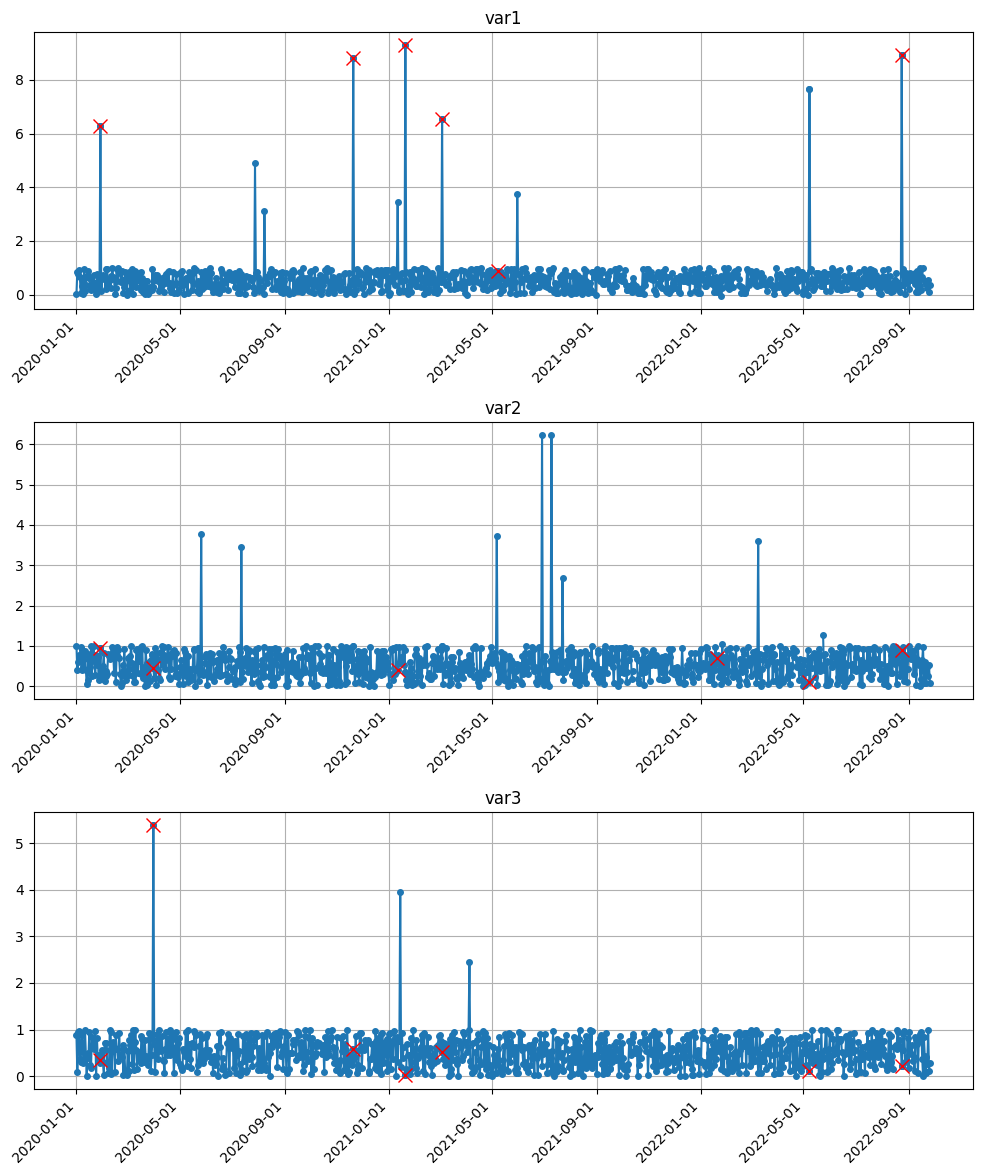

In [9]:
# plot final data with anomalies
plot_df(df_final)